# Part 2 - 2 Point Stats

 - rigourous way to classify microstructure
 
 - 2 point statistic contain the first order distribution of how states are related
 
Let's start using PyMKS by creating some artificial microsturctures to analyze

In [54]:
import pymks

## Construct Artificial Microstructures

In [55]:
from pymks.datasets import make_microstructure

In [56]:
?make_microstructure

In [57]:
data = make_microstructure(n_samples=1, size=(101, 101), n_phases=2, grain_size=(20, 20))

In [58]:
print(data.shape)

(1, 101, 101)


In [59]:
print(data[0, :10, :10])

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


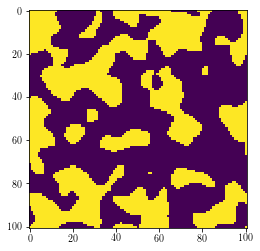

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(data[0])

## Lamellar Microstructure

In [61]:
data_lamellar = make_microstructure(n_samples=2, size=(101, 101), n_phases=2, grain_size=(95, 15))

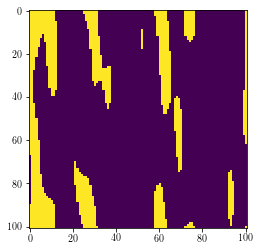

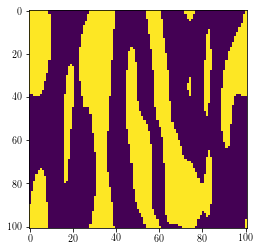

In [62]:
plt.imshow(data_lamellar[0])
plt.show()
plt.imshow(data_lamellar[1])
plt.show()

## Digital Signal -- Discretization

The next step is to deconstruct the microstructure into a digital signal,

 0 -> (1, 0)
 
 1 -> (0, 1)
 

In [63]:
import numpy as np

data = np.random.randint(2, size=(1, 3, 3))
print(data)
print(data.shape)

[[[0 0 0]
  [0 1 0]
  [1 0 0]]]
(1, 3, 3)


In [64]:
from pymks.bases import PrimitiveBasis

In [65]:
?PrimitiveBasis

In [66]:
basis = PrimitiveBasis(n_states=2, domain=[0, 1])
data_disc = basis.discretize(data)

In [67]:
print(data_disc.shape)

(1, 3, 3, 2)


In [68]:
print(data_disc[0, 0, 0])

[ 1.  0.]


## 2 Point Stats



In [442]:
np.random.seed(0)

data_blob = make_microstructure(n_samples=50, size=(101, 101), n_phases=2, grain_size=(30, 30), volume_fraction=[0.5, 0.5])
data_lamellar_v = make_microstructure(n_samples=50, size=(101, 101), n_phases=2, grain_size=(100, 10), volume_fraction=[0.5, 0.5])
data_lamellar_h = make_microstructure(n_samples=50, size=(101, 101), n_phases=2, grain_size=(10, 100), volume_fraction=[0.5, 0.5])


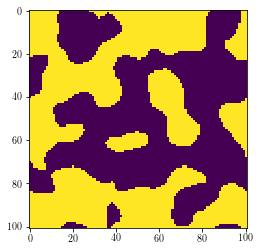

In [443]:
plt.imshow(data_blob[0])

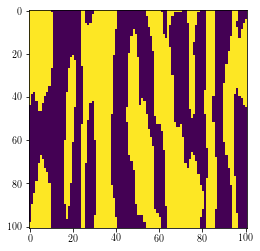

In [444]:
plt.imshow(data_lamellar_v[1])

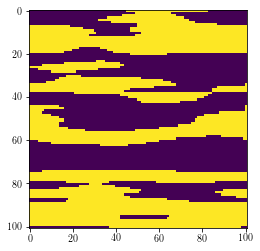

In [445]:
plt.imshow(data_lamellar_h[0])

In [446]:
data_lamellar_v.shape

(50, 101, 101)

In [447]:
data = np.concatenate([data_blob, data_lamellar_v, data_lamellar_h], axis=0)

In [448]:
data.shape

(150, 101, 101)

In [449]:
from pymks.stats import correlate

basis = PrimitiveBasis(n_states=2, domain=[0, 1])
data_corr = correlate(data, basis=basis)

In [450]:
data_corr.shape

(150, 101, 101, 3)

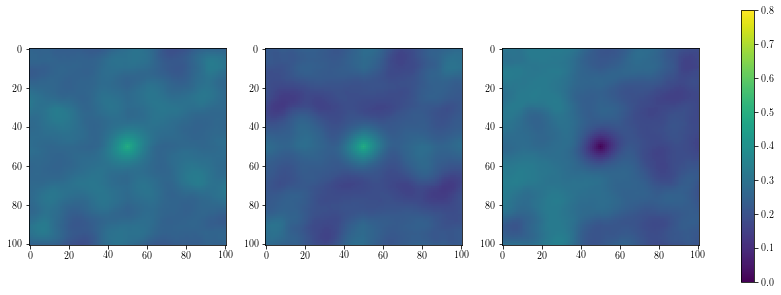

In [451]:
fig, axs = plt.subplots(1, 3)

for i, ax in enumerate(axs):
    im = ax.imshow(data_corr[0, :, :, i], vmin=0.0, vmax=0.8, cmap="viridis")
fig.set_size_inches(15, 5)
fig.colorbar(im, ax=axs.ravel().tolist());

In [452]:
print(data_corr[0, :, :, 0] + data_corr[0, :, :, 1] + data_corr[0, :, :, 2] + data_corr[0, ::-1, ::-1, 2])

[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


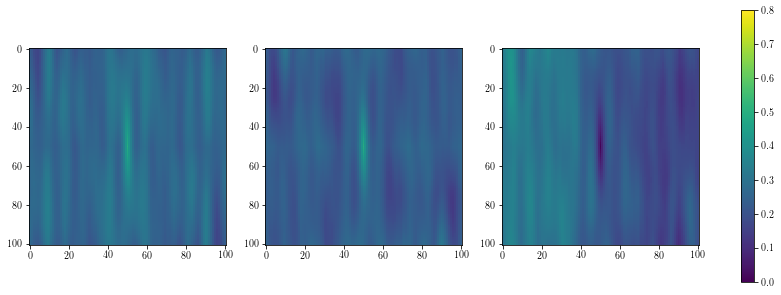

In [453]:
fig, axs = plt.subplots(1, 3)

for i, ax in enumerate(axs):
    im = ax.imshow(data_corr[50, :, :, i], vmin=0.0, vmax=0.8, cmap="viridis")
fig.set_size_inches(15, 5)
fig.colorbar(im, ax=axs.ravel().tolist());

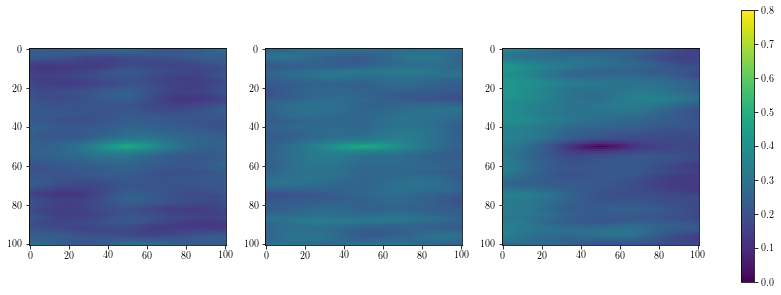

In [454]:
fig, axs = plt.subplots(1, 3)

for i, ax in enumerate(axs):
    im = ax.imshow(data_corr[-1, :, :, i], vmin=0.0, vmax=0.8, cmap="viridis")
fig.set_size_inches(15, 5)
fig.colorbar(im, ax=axs.ravel().tolist());

In [455]:
data_corr.shape

(150, 101, 101, 3)

## Dimensionality Reduction

In [456]:
data_reshape = np.reshape(data_corr, (data_corr.shape[0], data_corr[0].size))

In [457]:
print(data_corr[148, 0, 0])
print(data_reshape[148, :3])

[ 0.23068051  0.25990004  0.14763552]
[ 0.23068051  0.25990004  0.14763552]


In [458]:
data_reshape.shape

(150, 30603)

In [459]:
data_mean = data_reshape - np.mean(data_reshape, axis=1)[:, None]

In [460]:
print(max(data_reshape.flatten()))
print(min(data_reshape.flatten()))

0.556708958093
8.0969931622e-16


In [461]:
print(max(data_mean.flatten()))
print(min(data_mean.flatten()))

0.30481115011
-0.255142610954


In [471]:
from sklearn.decomposition import PCA

pca_model = PCA(svd_solver="randomized", n_components=5)

In [472]:
data_pca = pca_model.fit_transform(data_mean)

In [473]:
data_pca.shape

(150, 5)

/home/wd15/miniconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


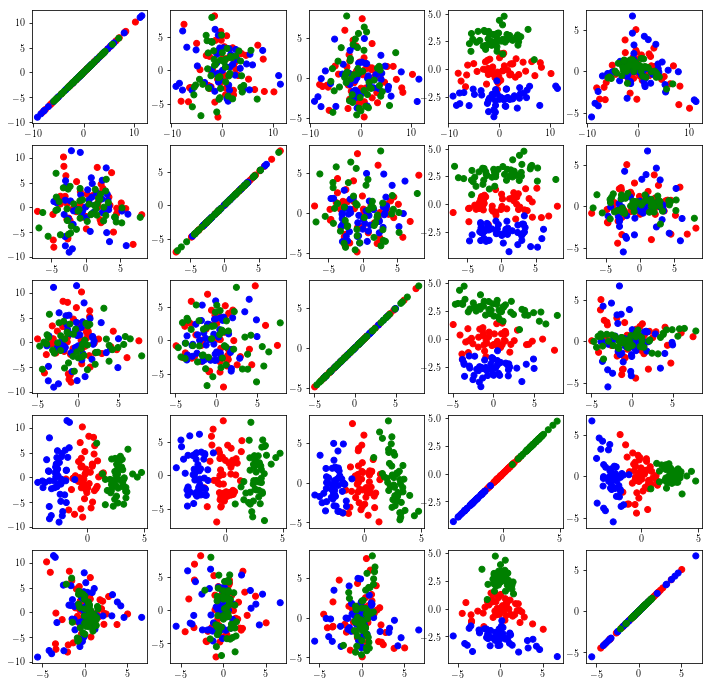

In [474]:
colors = ['r'] * 50 + ['b'] * 50 + ['g'] * 50

fig, axss = plt.subplots(5, 5)

for i, axs in enumerate(axss):
    for j, ax in enumerate(axs):
        ax.scatter(data_pca[:, i], data_pca[:, j], color=colors)
fig.set_size_inches(12, 12)
fig.show()

In [475]:
from bqplot import pyplot as bq_plt

classification = np.concatenate([np.zeros(50), np.ones(50), np.ones(50) + 1])
bq_plt.figure(title="Scatter Plot with colors")
bq_plt.scatter(data_pca[:, 2], data_pca[:, 3], color=classification)
bq_plt.show()

# Classification

In [476]:
from sklearn.linear_model import LogisticRegression

In [477]:
model = LogisticRegression(C=1)
model.fit(data_pca, classification)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [478]:
classification_pred = model.predict(data_pca)

In [479]:
from sklearn.metrics import confusion_matrix

confusion_matrix(classification, classification_pred)

array([[40,  6,  4],
       [ 0, 50,  0],
       [ 0,  0, 50]])

# Train Test Split

In [494]:
X, y = data_mean, classification

In [495]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y)

In [496]:
print(X_train.shape)

(112, 30603)


In [522]:
from sklearn.pipeline import Pipeline

model = Pipeline([('pca', PCA(n_components=5)),
                  ('classifier', LogisticRegression())])

In [523]:
model.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [524]:
y_pred = model.predict(X_test)

In [525]:
mat = confusion_matrix(y_test, y_pred)
print(mat / mat.sum())

[[ 0.31578947  0.07894737  0.05263158]
 [ 0.          0.31578947  0.        ]
 [ 0.          0.          0.23684211]]
